# **Paz Levi** - 315879452

###Explanation of the competition:

### **The Goal**

Each row in the dataset describes the characteristics of a house.
Our goal is to predict the SalePrice, given these features.
Our models are evaluated on the Root-Mean-Squared-Error (RMSE) between the log of the SalePrice predicted by our model, and the log of the actual SalePrice. Converting RMSE errors to a log scale ensures that errors in predicting expensive houses and cheap houses will affect our score equally.

### **The features:**

**Data fields Here's a brief version of what you'll find in the data description file:**

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality 

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

![image](https://user-images.githubusercontent.com/50837824/102707894-9fa08180-42a7-11eb-9162-6a2f67081835.png)


#### imports and sources

*   https://seaborn.pydata.org/tutorial/color_palettes.html
*   https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html



In [309]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures,Normalizer,StandardScaler,MinMaxScaler,PolynomialFeatures,OneHotEncoder
from sklearn import pipeline
# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.compose import ColumnTransformer
import plotly.express as px

from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,classification_report,r2_score,log_loss

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,StackingRegressor,VotingRegressor,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,SGDRegressor,RANSACRegressor


#### get the data from Kaggle

In [310]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
!kaggle competitions download -c house-prices-advanced-regression-techniques
print()

mkdir: cannot create directory ‘/root/.kaggle’: File exists
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)



#### read the data

In [311]:
train = pd.read_csv('train.csv')
y = train.SalePrice
train.drop(['SalePrice','Id'],axis=1,inplace=True)
test = pd.read_csv('test.csv')
test.drop(['Id'],axis=1,inplace=True)


#### Visualization of the DATA

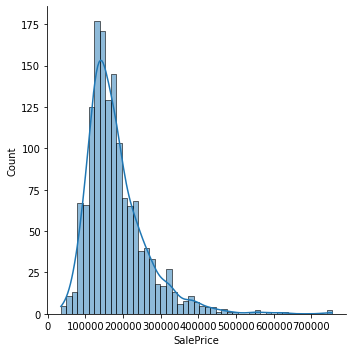

In [312]:
sns.displot(y,kde=True)
plt.show()

Because there are a lot of features we will look at the most influential columns (by correlation)

In [313]:
# sns.pairplot(train[train.corrwith(y)[abs(train.corrwith(y))>0.6].index].join(y))
# plt.show()
# plt.cla()

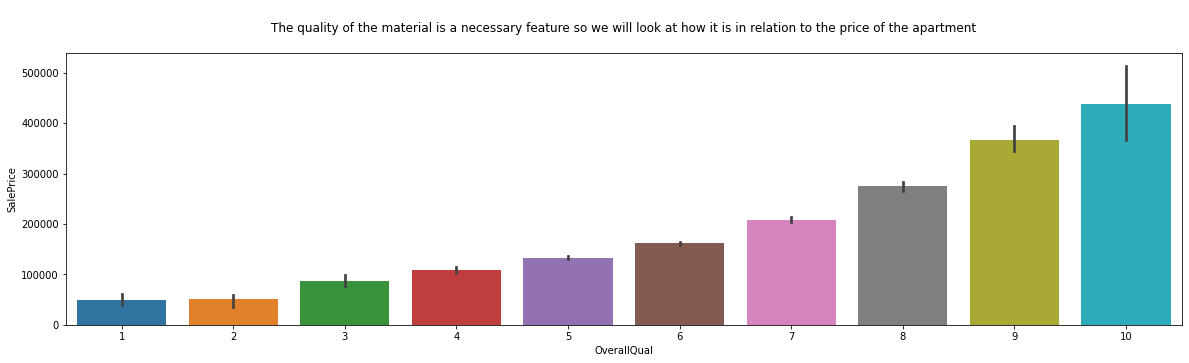

In [314]:
plt.figure(figsize=(20,5))
plt.title('''
The quality of the material is a necessary feature so we will look at how it is in relation to the price of the apartment
''')
sns.barplot(x='OverallQual',y='SalePrice',data=train.join(y))
plt.show()

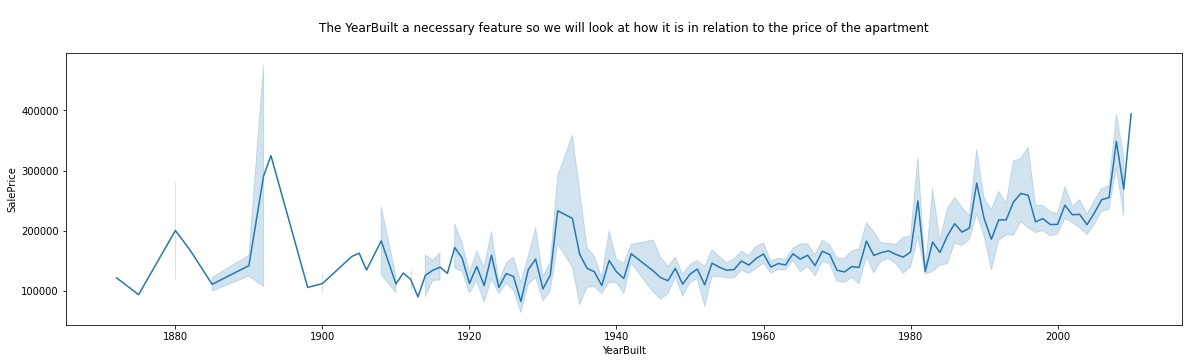

In [315]:
plt.figure(figsize=(20,5))
plt.title('''
The YearBuilt a necessary feature so we will look at how it is in relation to the price of the apartment
''')
sns.lineplot(x='YearBuilt',y='SalePrice',data=train.join(y))
plt.show()

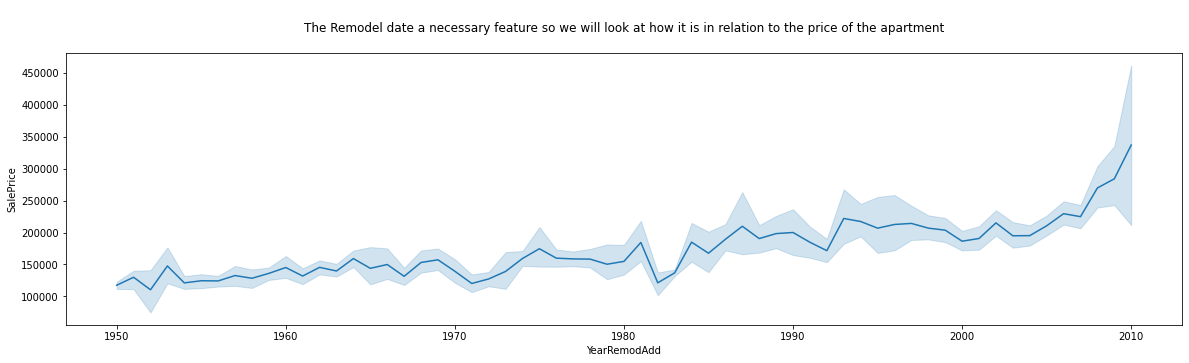

In [316]:
plt.figure(figsize=(20,5))
sns.lineplot(x='YearRemodAdd',y='SalePrice',data=train.join(y))
plt.title('''
The Remodel date a necessary feature so we will look at how it is in relation to the price of the apartment
''')
plt.show()

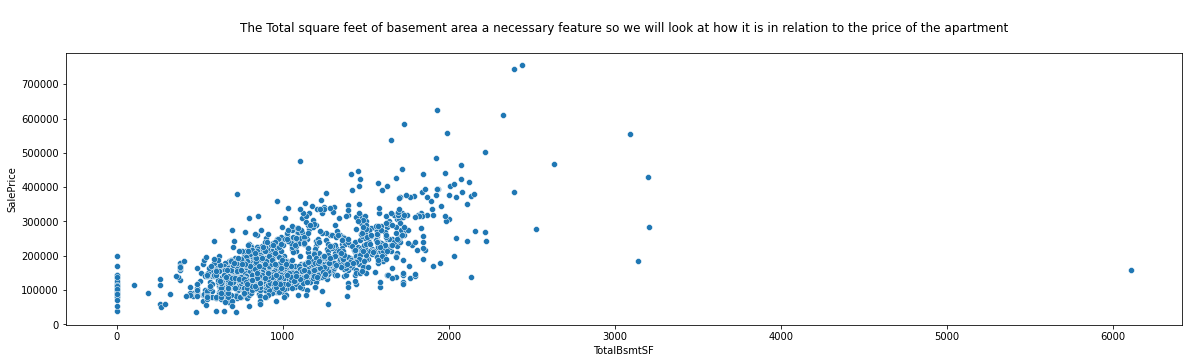

In [317]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=train.join(y))
plt.title('''
The Total square feet of basement area a necessary feature so we will look at how it is in relation to the price of the apartment
''')
plt.show()

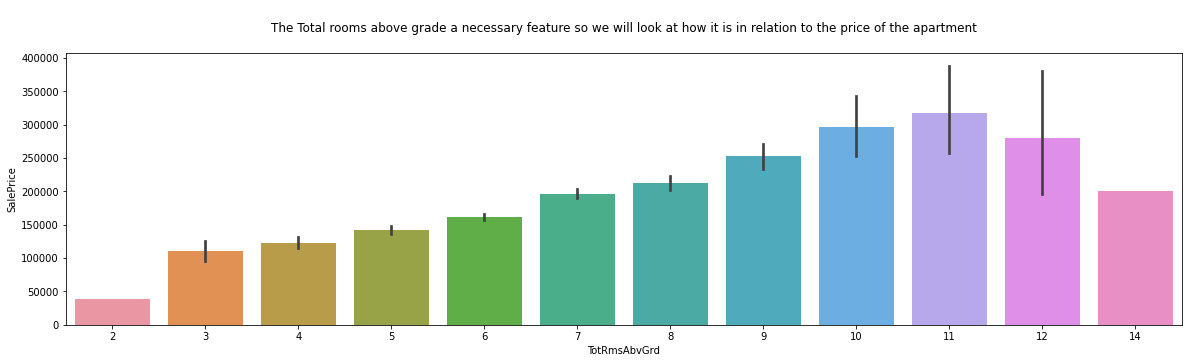

In [318]:
plt.figure(figsize=(20,5))
plt.title('''
The Total rooms above grade a necessary feature so we will look at how it is in relation to the price of the apartment
''')
sns.barplot(x='TotRmsAbvGrd',y='SalePrice',data=train.join(y))
plt.show()

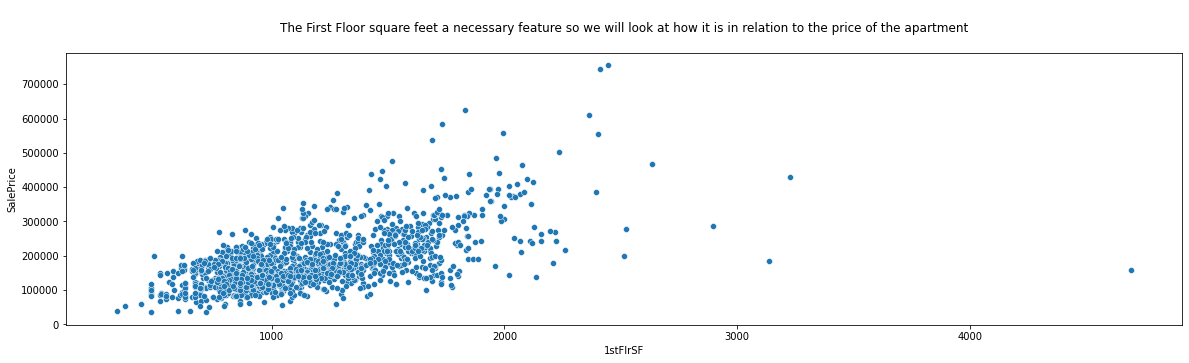

In [319]:
plt.figure(figsize=(20,5))
plt.title('''
The First Floor square feet a necessary feature so we will look at how it is in relation to the price of the apartment
''')
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=train.join(y))
plt.show()

In [320]:
train['size'] = train['2ndFlrSF'] + train['1stFlrSF']
test['size'] = test['2ndFlrSF'] + test['1stFlrSF']

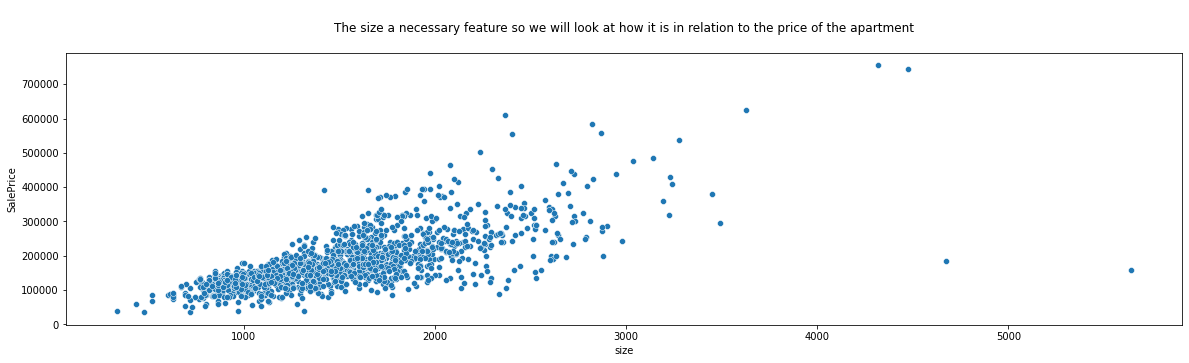

In [321]:

#I made a feature that would include the size of the two floors
plt.figure(figsize=(20,5))
plt.title('''
The size a necessary feature so we will look at how it is in relation to the price of the apartment
''')
sns.scatterplot(x='size',y='SalePrice',data=train.join(y))
plt.show()

In [322]:
train["Average build quality"] = abs(train.GrLivArea - train.LowQualFinSF)
test["Average build quality"] = abs(test.GrLivArea - test.LowQualFinSF)

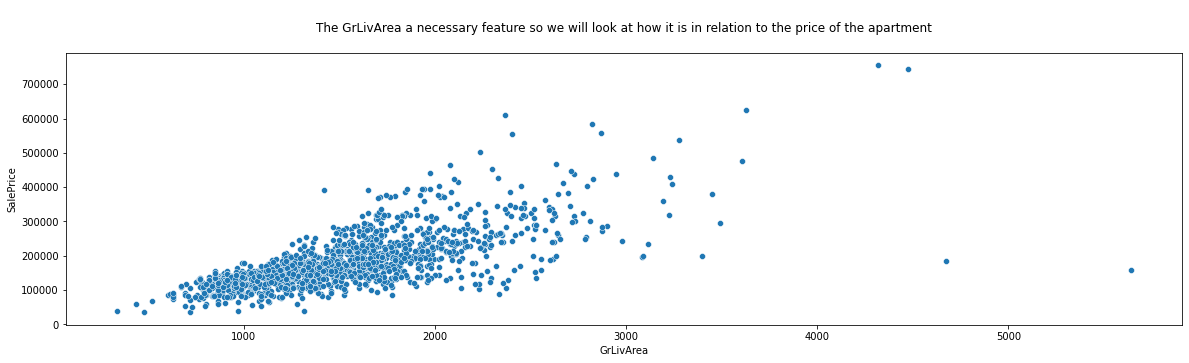

In [323]:
plt.figure(figsize=(20,5))
plt.title('''
The GrLivArea a necessary feature so we will look at how it is in relation to the price of the apartment
''')
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train.join(y))
plt.show()

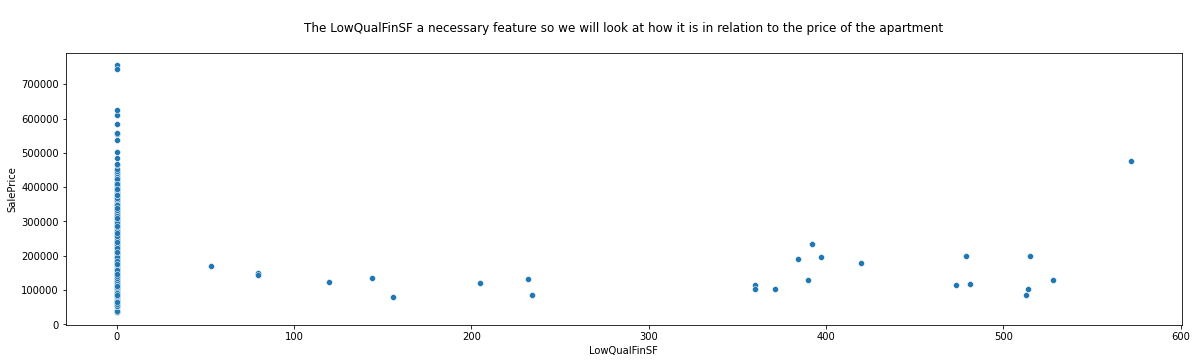

In [324]:
plt.figure(figsize=(20,5))
plt.title('''
The LowQualFinSF a necessary feature so we will look at how it is in relation to the price of the apartment
''')
sns.scatterplot(x='LowQualFinSF',y='SalePrice',data=train.join(y))
plt.show()

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [325]:
GR_type_dic = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}
train = train.replace({"BsmtFinType1": GR_type_dic})
train = train.replace({"BsmtFinType2": GR_type_dic})

test = test.replace({"BsmtFinType1": GR_type_dic})
test = test.replace({"BsmtFinType2": GR_type_dic})


In [326]:
train['GR_Type new'] = (train.BsmtFinType1+train.BsmtFinType2)*train.TotalBsmtSF

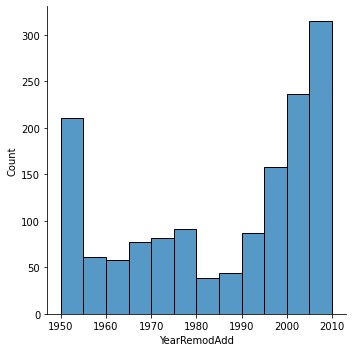

In [327]:
sns.displot(train.YearRemodAdd)

In [328]:
train.YearBuilt  = (train.YearBuilt // 10)*10
train.YearRemodAdd  = (train.YearRemodAdd // 10)*10

test.YearBuilt  = (test.YearBuilt // 10)*10
test.YearRemodAdd  = (test.YearRemodAdd // 10)*10

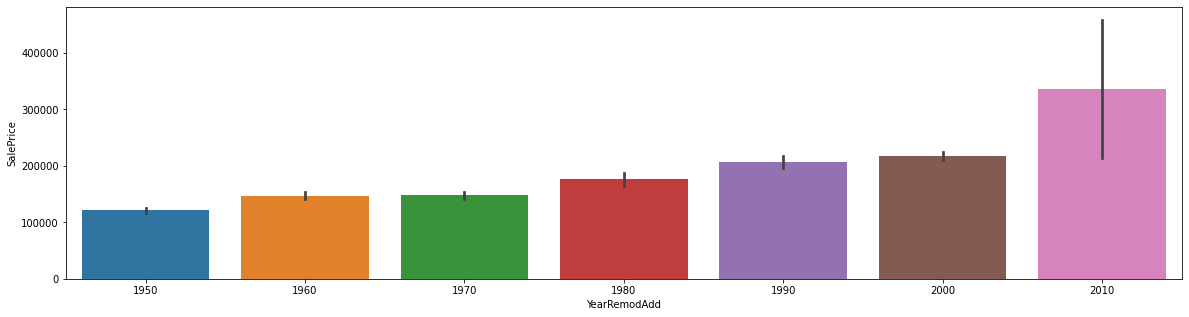

In [329]:
plt.figure(figsize=(20,5))
sns.barplot(x='YearRemodAdd',y='SalePrice',data=train.join(y))
plt.show()

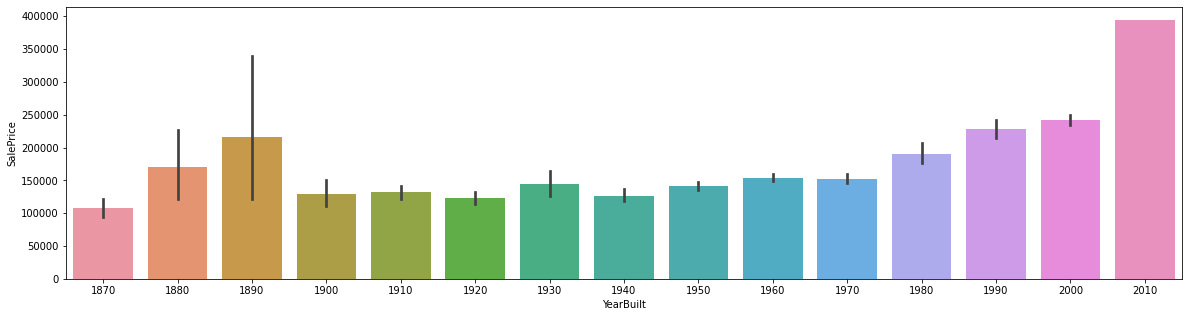

In [330]:
plt.figure(figsize=(20,5))
sns.barplot(x='YearBuilt',y='SalePrice',data=train.join(y))
plt.show()

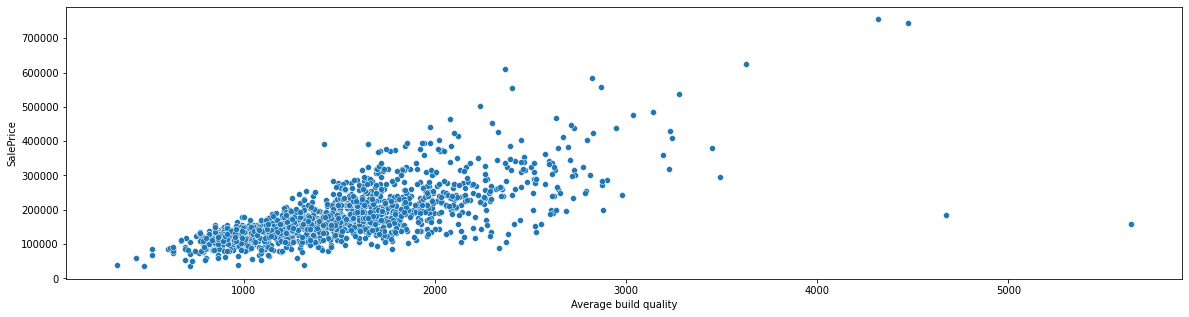

In [331]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='Average build quality',y='SalePrice',data=train.join(y))
plt.show()

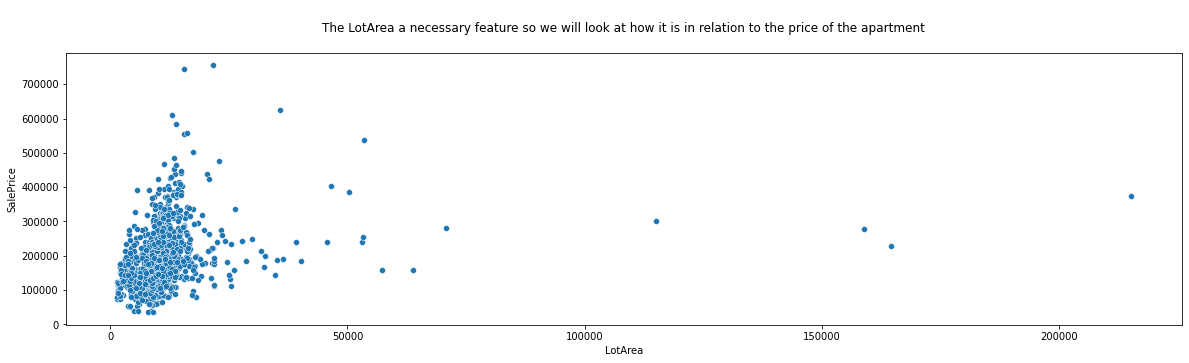

In [332]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='LotArea',y='SalePrice',data=train.join(y))
plt.title('''
The LotArea a necessary feature so we will look at how it is in relation to the price of the apartment
''')
plt.show()

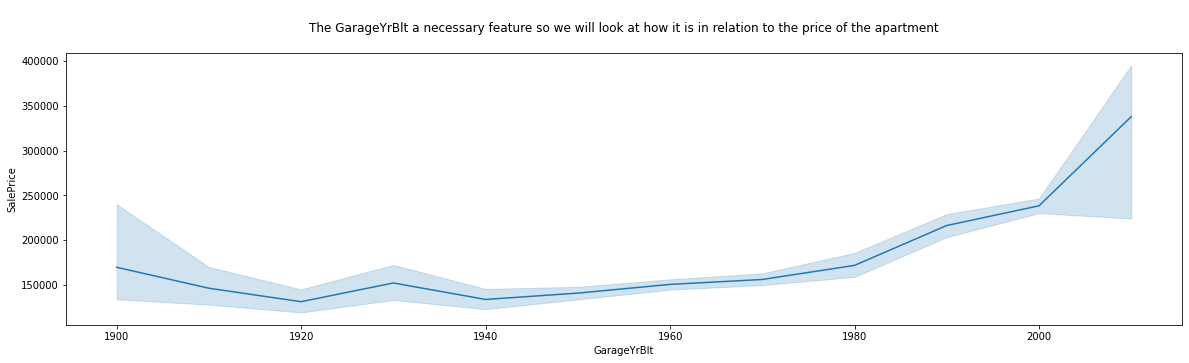

In [333]:
train.GarageYrBlt  = (train.GarageYrBlt // 10)*10

plt.figure(figsize=(20,5))
plt.title('''
The GarageYrBlt a necessary feature so we will look at how it is in relation to the price of the apartment
''')
sns.lineplot(x='GarageYrBlt',y='SalePrice',data=train.join(y))
plt.show()

In [334]:
abs(train.corrwith(y)[abs(train.corrwith(y))>0.4]).sort_values(ascending=False)

OverallQual              0.790982
Average build quality    0.716883
size                     0.716883
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
TotRmsAbvGrd             0.533723
GR_Type new              0.521107
YearBuilt                0.515824
YearRemodAdd             0.492294
GarageYrBlt              0.479519
MasVnrArea               0.477493
Fireplaces               0.466929
dtype: float64

#### show missing Data

In [335]:
# plt.figure(figsize=(20,6))
# sns.heatmap(train.isnull())
# plt.show()

In [336]:
df_train_test = pd.concat([train,test])

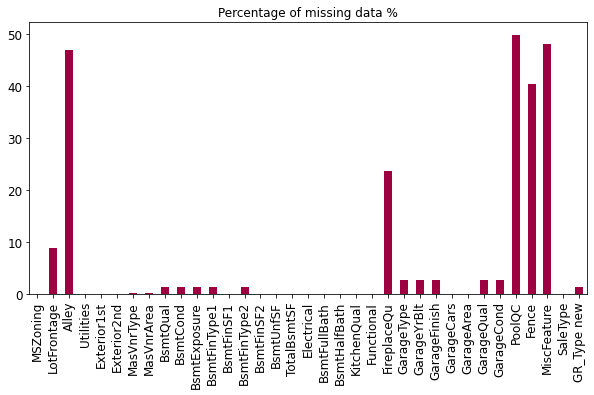

In [337]:
null_table = pd.DataFrame(train.isnull().sum()[df_train_test.isnull().sum()>0],columns=['null values']) 
null_table['percent of null%'] = null_table['null values']/len(df_train_test)*100
null_table['percent of null%'].plot(kind='bar',figsize=(10,5),title='Percentage of missing data %',fontsize =12,colormap =sns.color_palette("Spectral", as_cmap=True))
plt.show()



```
I decided that if there is more than 40% data missing in the column then it is removed
```



#### Removal and filling of missing data

Because the values are stringed in a hierarchical order then we will encode them using a dictionary

In [338]:
str1 = '''Ex
Gd
TA
Fa
Po'''
d = dict()
for i,j in enumerate(str1.split('\n')):
  d[j] = i
train = train.replace({'ExterQual':d})
train = train.replace({'ExterCond':d})
train = train.replace({'HeatingQC':d})

test = test.replace({'ExterQual':d})
test = test.replace({'ExterCond':d})
test = test.replace({'HeatingQC':d})


In [339]:
d['NA'] = 5

train = train.replace({'FireplaceQu':d})
train = train.replace({'GarageCond':d})
train = train.replace({'BsmtQual':d})
train = train.replace({'BsmtCond':d})
train = train.replace({'GarageQual':d})


test = test.replace({'FireplaceQu':d})
test = test.replace({'GarageCond':d})
test = test.replace({'BsmtQual':d})
test = test.replace({'BsmtCond':d})
test = test.replace({'GarageQual':d})

In [340]:
abs(train.corrwith(y)[abs(train.corrwith(y))>0.4]).sort_values(ascending=False)

OverallQual              0.790982
Average build quality    0.716883
size                     0.716883
GrLivArea                0.708624
ExterQual                0.682639
BsmtQual                 0.644019
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
TotRmsAbvGrd             0.533723
GR_Type new              0.521107
YearBuilt                0.515824
YearRemodAdd             0.492294
GarageYrBlt              0.479519
MasVnrArea               0.477493
Fireplaces               0.466929
HeatingQC                0.427649
dtype: float64

In [341]:
print('''
              columns_Removals
''')
threshold_missing  = 40
columns_removals = null_table[null_table['percent of null%'] > threshold_missing]
columns_removals


              columns_Removals



,null values,percent of null%
Alley,1369,46.899623
PoolQC,1453,49.777321
Fence,1179,40.390545
MiscFeature,1406,48.167181


In [342]:
for i in null_table[null_table['percent of null%'] > threshold_missing].index:
  df_train_test.drop(i,axis=1,inplace=True)

Fill missing data

In [343]:
for i in null_table[null_table['percent of null%'] <= threshold_missing].index:
  if df_train_test[i].dtype == 'O':
    # print(i)
    df_train_test[i].fillna(df_train_test[i].value_counts().index[0],inplace=True)
  else:
    df_train_test[i].fillna(df_train_test[i].mean(),inplace=True)

In [344]:
train= df_train_test[:len(train)]
test = df_train_test[len(train):]

#### Encode the missing data by Dummy

In [345]:
for i in train.dtypes[train.dtypes == 'object'].index:
    dummy = pd.get_dummies(train[i],prefix=i,drop_first=True)
    dummy_test = pd.get_dummies(test[i],prefix=i,drop_first=True)
    new_df = pd.DataFrame(columns=dummy.columns)
    train = train.join(dummy)
    test = test.join(pd.concat([new_df,dummy_test]))
    train.drop(i,axis=1,inplace=True)
    test.drop(i,axis=1,inplace=True)

In [346]:
test.fillna(0,inplace=True)

In [347]:
test.isnull().sum()[test.isnull().sum()>0]

Series([], dtype: int64)

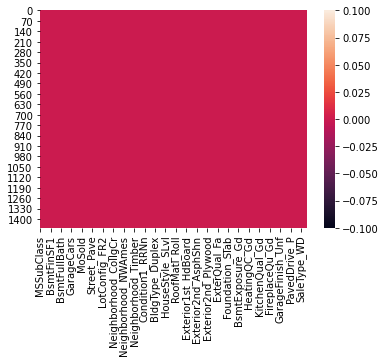

In [348]:
sns.heatmap(train.isnull())

In [349]:
train = pd.DataFrame(StandardScaler().fit_transform(train),columns=train.columns)
test = pd.DataFrame(StandardScaler().fit_transform(test),columns=test.columns)

In [350]:
# # convert data points to 2dim with pca
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2).fit(train)
# pca_pokemon_df = pd.DataFrame(pca.transform(train), columns=['pc1', 'pc2'])
# pca_pokemon_df

#selecting features:

## Selection of columns by Threshold of the correlation to the targe column - PRICE






```
# by correlation
```



In [351]:
def prepare_best_columns(threshold_corr):
  return train.corrwith(y)[abs(train.corrwith(y))>threshold_corr].index
chosen_columns =prepare_best_columns(0.3)

In [352]:
def prepare_X(chosen_columns,data=train):
  X = data[chosen_columns]
  std = StandardScaler()
  std.fit(X)
  return X

In [353]:
threshold_corr_arr = np.arange(0.05,0.65,0.05)
df_selection_feature_by_corr = pd.DataFrame(columns=['threshold corr','MSE train','MSE test'])
for threshold_corr in threshold_corr_arr:
  chosen_columns = prepare_best_columns(threshold_corr)
  # print(chosen_columns)
  X = prepare_X(chosen_columns)
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state=42)
  model = GradientBoostingRegressor().fit(X_train,y_train)
  preds_test = model.predict(X_val)
  preds_train = model.predict(X_train)
  error_mse_test =np.log(mean_squared_error(abs(preds_test),y_val)**0.5)
  error_mse_train = np.log(mean_squared_error(preds_train,y_train)**0.5)
  df_selection_feature_by_corr = df_selection_feature_by_corr.append({'threshold corr':threshold_corr,'MSE train':error_mse_train,'MSE test':error_mse_test},ignore_index=True)

In [354]:
display(df_selection_feature_by_corr)
display(train.corrwith(y)[train.corrwith(y)>0.3])


,threshold corr,MSE train,MSE test
0,0.05,9.548982,10.183088
1,0.10,9.577417,10.227551
2,0.15,9.610123,10.220157
3,0.20,9.603866,10.203997
4,0.25,9.638602,10.191300
5,0.30,9.677469,10.271410
6,0.35,9.722984,10.252761
7,0.40,9.826095,10.205513
8,0.45,9.835865,10.202253
9,0.50,9.884041,10.314093


LotFrontage              0.334820
OverallQual              0.790982
YearBuilt                0.515824
YearRemodAdd             0.492294
MasVnrArea               0.475210
BsmtFinSF1               0.386420
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
2ndFlrSF                 0.319334
GrLivArea                0.708624
FullBath                 0.560664
TotRmsAbvGrd             0.533723
Fireplaces               0.466929
GarageYrBlt              0.458953
GarageCars               0.640409
GarageArea               0.623431
WoodDeckSF               0.324413
OpenPorchSF              0.315856
size                     0.716883
Average build quality    0.716883
GR_Type new              0.513807
Neighborhood_NoRidge     0.330424
Neighborhood_NridgHt     0.402149
Exterior1st_VinylSd      0.305009
Exterior2nd_VinylSd      0.306389
MasVnrType_Stone         0.330476
ExterQual_Gd             0.452466
Foundation_PConc         0.497734
BsmtExposure_Gd          0.307298
KitchenQual_Gd

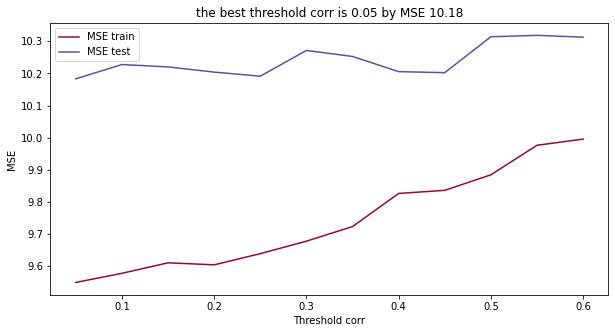

In [355]:

best_score_corr = df_selection_feature_by_corr[df_selection_feature_by_corr['MSE test'] == min(df_selection_feature_by_corr['MSE test'])]
df_selection_feature_by_corr.plot(x='threshold corr',y=['MSE train','MSE test'],kind='line',figsize=(10,5),title='MSE by threshold corr',fontsize =10,colormap= sns.color_palette("Spectral", as_cmap=True))
plt.ylabel('MSE')
plt.xlabel('Threshold corr')
plt.title('the best threshold corr is {} by MSE {:.2f}'.format(float(best_score_corr['threshold corr']),float(best_score_corr['MSE test'])))
plt.show()

In [356]:
train.isna().sum()[train.isna().sum()>0]

Series([], dtype: int64)

### 2

We can also use Scikit-learn RFECV to use CV and choose the best number of features on this dataset.
The default CV is 5-fold cross-validation.
We will enter the Scikit-learn RepeatedKFold to repeat each KFold a few times with different splits.



In [357]:
# find best subset of features on this dataset

from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold

X_encoded = pd.DataFrame(train,columns=train.columns)

selector = RFECV(LinearRegression(), cv=kfolds).fit(train, y )
selected_features = X_encoded.loc[:, selector.support_]
display(selected_features.head())

fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.grid_scores_) + 1)], y=selector.grid_scores_))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()

,OverallQual
0,0.651479
1,-0.071836
2,0.651479
3,0.651479
4,1.374795


In [358]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

all_features = pd.DataFrame(train,columns=train.columns)
 
fs = SelectKBest(k=40)
X_selected = fs.fit_transform(all_features, y)
sec_way = pd.DataFrame((train.loc[:, fs.get_support()]))
fs.scores_

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning:

divide by zero encountered in true_divide



array([ 0.87260303,  1.2101018 ,  3.28585169,  5.72918291,  1.1035498 ,
        2.2015981 ,  1.72804234,  1.98778938,  1.295125  ,  1.6947186 ,
        0.85376554,  0.99400329,  1.45434799,  2.31528973,  2.33862015,
        1.66399252,  0.85378443,  3.43511031,  1.13556658,  0.84759623,
        2.67884748,  1.41517084,  1.23591614,  0.87525081,  1.87313165,
        1.64072004,  1.70668226,  2.86159438,  2.58334056,  1.37876619,
        1.42327718,  0.79704962,  0.87632901,  0.99972075,  0.98233679,
        3.75624998,  0.94758753,  1.06953295,  3.60270664,  3.60270664,
        2.06111433,  1.98089619,  0.61824311,  1.12852505,  1.0975268 ,
        1.87071671,  1.02117159,  2.59332161,  1.44625904,  1.47318591,
        0.82854852,  1.06931867,  0.23979597,  1.28288142,  1.05676748,
        1.07523276,  0.96699049,  1.13484736,  1.04702323,  0.26824999,
        0.91779716,  0.92096218,  0.60104711,  1.43471506,  1.43193228,
        0.81416688,  1.10558483,  1.29042092,  1.09331038,  0.69

In [359]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# k_features_threshold =np.arange(3,40,7)
# df_forward = pd.DataFrame(columns=['K','MSE train','MSE val'])
# for k_features_num in k_features_threshold:
#   sfs1 = SFS(LinearRegression(), k_features=int(k_features_num), forward=True, floating=False,scoring='r2',cv=0)
#   sfs1 = sfs1.fit(train, y)
#   X = prepare_X(train.columns[[sfs1.k_feature_idx_]])
#   test_X = prepare_X(test.columns[[sfs1.k_feature_idx_]], data=test)
#   X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state=42)
#   model = LinearRegression().fit(X_train,y_train)
#   preds = model.predict(X_val)
#   error_mse_val = np.log(mean_squared_error(abs(preds),y_val)**0.5)
#   error_mse_train = np.log(mean_squared_error(model.predict(X_train),y_train)**0.5)
#   df_forward = df_forward.append({'K':k_features_num,'MSE train':error_mse_train,'MSE val':error_mse_val},ignore_index=True)

In [360]:
# best_forward = df_forward[df_forward['MSE val'] == min(df_forward['MSE val'])]

In [361]:
# df_forward.plot(x='K',y=['MSE train','MSE val'],kind='line',
#                 figsize=(10,5),
#                 fontsize =12,colormap =sns.color_palette("Spectral", as_cmap=True))
# plt.title('Percentage of missing data %\nthe best K is {} by MSE = {}'.format(int(best_forward.K),float(best_forward['MSE val'])))
# plt.ylabel('MSE')
# plt.show()

## selectiong size of the validation set

In [362]:
X = prepare_X(train.columns[[sfs1.k_feature_idx_]])
# X = prepare_X(chosen_columns,1)
df_val = pd.DataFrame(columns=['val size','MSE train','MSE test'])
for threshold_val in np.arange(0.05,0.7,0.05):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= threshold_val, random_state=42)
  model = LinearRegression().fit(X_train,y_train)
  preds = model.predict(X_val)
  error_mse_test = np.log(mean_squared_error(abs(preds),y_val)**0.5)
  error_mse_train = np.log(mean_squared_error(model.predict(X_train),y_train)**0.5)

  df_val = df_val.append({'val size':threshold_val,'MSE train':error_mse_train,'MSE test':error_mse_test},ignore_index=True)

  

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:4114: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [363]:
df_val

,val size,MSE train,MSE test
0,0.05,10.153138,10.118587
1,0.10,10.133762,10.310596
2,0.15,10.132360,10.264500
3,0.20,10.135836,10.229031
4,0.25,10.151917,10.170629
5,0.30,10.150611,10.171949
6,0.35,10.112444,10.237404
7,0.40,10.106838,10.234290
8,0.45,10.120170,10.226723
9,0.50,10.041562,10.329163


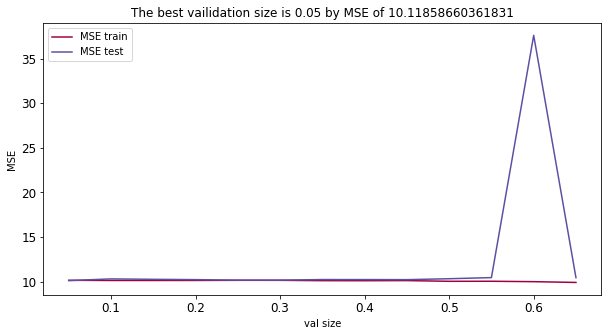

In [364]:
best_val = df_val[df_val['MSE test']==min(df_val['MSE test'])]

df_val.plot(x='val size',y=['MSE train','MSE test'],kind='line',
                figsize=(10,5),title='Percentage of missing data %',
                fontsize =12,colormap =sns.color_palette("Spectral", as_cmap=True))
plt.ylabel('MSE')
plt.title('The best vailidation size is {} by MSE of {}'.format(float(best_val['val size']),float(best_val['MSE test'])))
plt.show()

In [365]:
best_val

,val size,MSE train,MSE test
0,0.05,10.153138,10.118587


# Selectiong model

In [366]:
reggresors = [KNeighborsRegressor(),ExtraTreeRegressor(random_state=1),DecisionTreeRegressor(random_state=1, max_features='auto')
                ,BaggingRegressor(random_state=1),GradientBoostingRegressor(random_state=1),Lasso(random_state=1)
                ,LinearRegression(),Ridge(random_state=1),SGDRegressor(random_state=1),RANSACRegressor(random_state=1),SVR(),AdaBoostRegressor(random_state=1)]
                

In [367]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsRegressor(n_neighbors=5), hyper_parameters).fit(sec_way, y)
print('Accuracy score for classification:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

Accuracy score for classification:
gs_neigh_model 0.7858901563971457
best params {'n_neighbors': 4}


In [368]:
df_statics = pd.DataFrame(columns=["Regressor",'MSE train','MSE test','R2 train','R2 test'])

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)


X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.05, random_state=42)	

for rg in reggresors:
  name = rg.__class__.__name__
  rg.fit(X_train, y_train)
  train_predictions = rg.predict(X_test)

  mse_train = np.log(mean_squared_error(rg.predict(X_train),y_train))
  mse_test = np.log(mean_squared_error(rg.predict(X_test),y_test))
  r2_train = r2_score(rg.predict(X_train),y_train)
  r2_test = r2_score(rg.predict(X_test),y_test)
  df_statics = df_statics.append({"Regressor":name,'MSE train':mse_train,'MSE test':mse_test,'R2 train':r2_train,'R2 test':r2_test},ignore_index=True)

display(df_statics)


,Regressor,MSE train,MSE test,R2 train,R2 test
0,KNeighborsRegressor,21.495792,20.996247,0.486700,0.707672
1,ExtraTreeRegressor,21.432593,20.927809,0.529025,0.725943
2,DecisionTreeRegressor,21.432593,20.927809,0.529025,0.725943
3,BaggingRegressor,21.434526,20.925559,0.510054,0.716288
4,GradientBoostingRegressor,21.432593,20.927808,0.528992,0.725925
5,Lasso,21.605816,20.981645,0.385164,0.674280
6,LinearRegression,21.605816,20.981642,0.385184,0.674291
7,Ridge,21.605817,20.981772,0.384296,0.673779
8,SGDRegressor,21.605824,20.981243,0.387712,0.675763
9,RANSACRegressor,21.726044,21.225634,-0.297434,0.222107


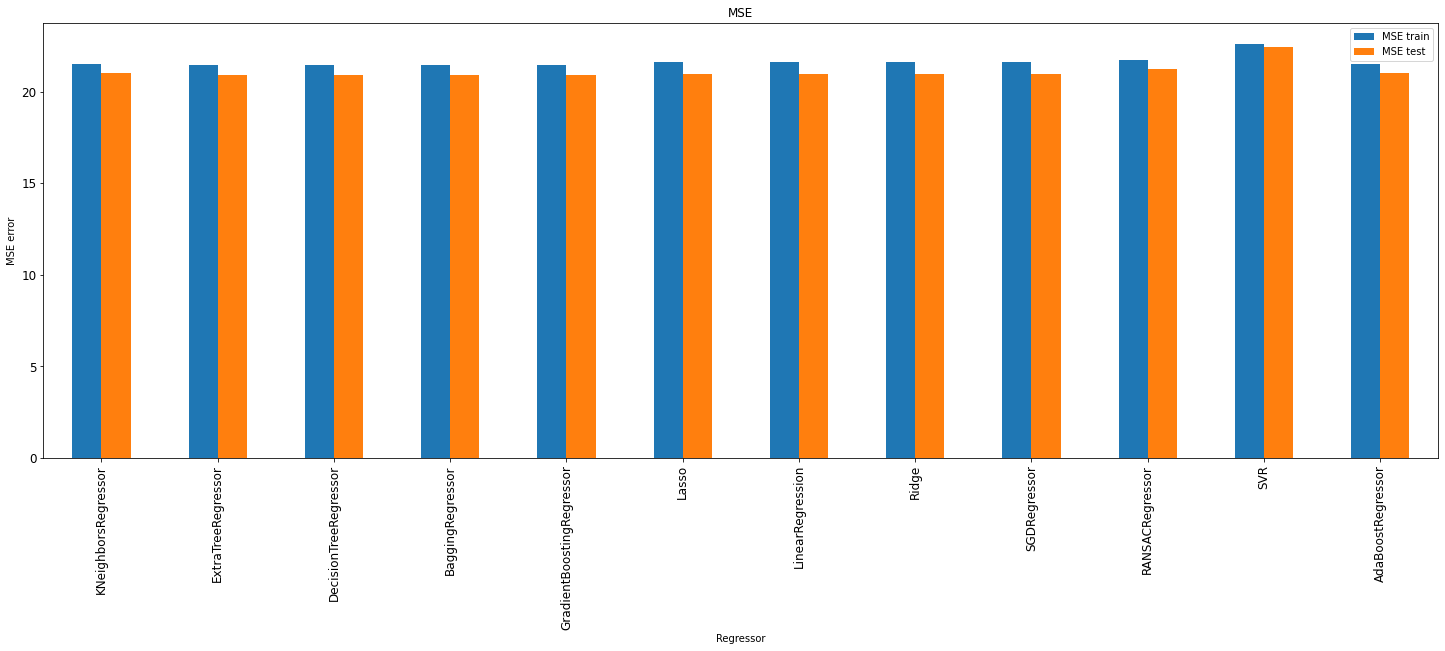

In [369]:
plt.ylabel('MSE error')
plt.title('MSE')
df_statics.plot(x='Regressor',y=['MSE train','MSE test'],kind='bar',figsize=(25,8),ax=plt.gca(),fontsize=12)
plt.show()


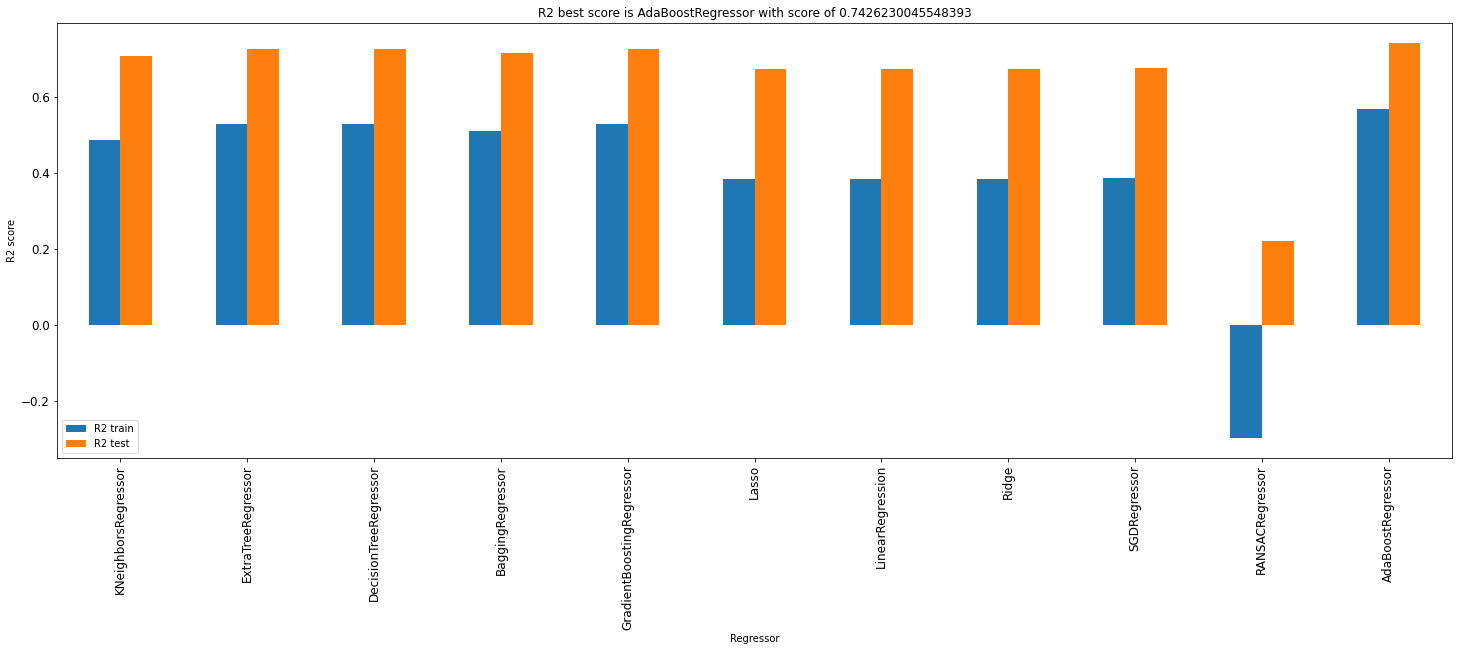

In [370]:
plt.ylabel('R2 score')
plt.title('R2 best score is {} with score of {}'.format(df_statics['Regressor'][df_statics['R2 test'] == max(df_statics['R2 test'])].values[0],
                                                        float(df_statics['R2 test'][df_statics['R2 test'] == max(df_statics['R2 test'])])))
df_statics[df_statics['Regressor']!='SVR'].plot(x='Regressor',y=['R2 train','R2 test'],kind='bar',figsize=(25,8),ax=plt.gca(),fontsize=12)
plt.show()

In [371]:
df_statics['Regressor'][df_statics['MSE test'] == min(df_statics['MSE test'])]

3    BaggingRegressor
Name: Regressor, dtype: object

# SELECT HIYPER-PARAMETERS


In [372]:
np.arange(0.01,1.0,0.2)

array([0.01, 0.21, 0.41, 0.61, 0.81])

In [397]:
# train with grid search and get best parameters
from sklearn.model_selection import GridSearchCV

# C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0
parameters = {'learning_rate': np.arange(0.01,1.0,0.1),
                  # 'n_estimators' : [100,500,1000, 1500],
                 }
gs_model = GridSearchCV(GradientBoostingRegressor(), cv= 2 ,param_grid=parameters).fit(train, y)
print('Accuracy score for regressor:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

Accuracy score for regressor:
gs_model 0.8723805743503865
best params {'learning_rate': 0.11}


In [398]:
# train with grid search and get best parameters
from sklearn.model_selection import GridSearchCV

parameters = {
                  'n_estimators' : [100,200,300,400,500],
                 }
gs_model = GridSearchCV(GradientBoostingRegressor(learning_rate=0.11,n_estimators=500,random_state=1), cv= 3 ,param_grid=parameters).fit(train, y)
print('Accuracy score for regressor:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

Accuracy score for regressor:
gs_model 0.8959817967486149
best params {'n_estimators': 500}


In [399]:
# train with random search and get best parameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

np.random.seed(1)
distributions = {'n_estimators': np.arange(10,200,30)}

rs_model = RandomizedSearchCV(BaggingRegressor(random_state=1), distributions, random_state=1).fit(train, y)
print('Accuracy score for regrresion:')
print('rs_model', rs_model.best_score_)
print('best params', rs_model.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.



Accuracy score for regrresion:
rs_model 0.8527309545856309
best params {'n_estimators': 190}


In [400]:
# train with random search and get best parameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

np.random.seed(1)
distributions = {'n_estimators': np.arange(10,200,30)}

rs_model = RandomizedSearchCV(AdaBoostRegressor(random_state=1), distributions, random_state=1).fit(train, y)
print('Accuracy score for regrresion:')
print('rs_model', rs_model.best_score_)
print('best params', rs_model.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.



Accuracy score for regrresion:
rs_model 0.7952556108209122
best params {'n_estimators': 40}


# submission

In [412]:
# train with grid search and get best parameters
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators' : [500]}
gs_model = GridSearchCV(GradientBoostingRegressor(learning_rate=0.11,n_estimators=500,random_state=1), cv= 3 ,param_grid=parameters).fit(train, y)
print('Accuracy score for regressor:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

Accuracy score for regressor:
gs_model 0.8940053431998894
best params {'n_estimators': 500}


In [429]:
sub = pd.read_csv('sample_submission.csv')
a = pd.DataFrame(columns=['SalePrice'],index=sub.Id)
a['SalePrice'] =  gs_model.predict(test)
a.to_csv('submission- paz.csv')

In [ ]:
# model_arr = [LinearRegression(),Ridge(), Lasso()]
# model_names = ['LinearRegression','ElasticNet','Ridge', 'Lasso']

# sfs1 = SFS(Lasso(), k_features=int(best_forward['K']), forward=True, floating=False,scoring='r2',cv=0)
# sfs1 = sfs1.fit(train, y)
# X = prepare_X(train.columns[[sfs1.k_feature_idx_]])
# models_df = pd.DataFrame(columns=['model name','MSE train','MSE test','r2 train','r2 test','model'])
# test_X = prepare_X(test.columns[[sfs1.k_feature_idx_]], data=test)
# for index,model_ in enumerate(model_arr):
#   X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= float(best_val['val size']), random_state=42)
#   model = model_.fit(X_train,y_train)
#   preds = model.predict(X_val)
#   error_mse_val = mean_squared_error(abs(preds),y_val)**0.5
#   error_mse_train = mean_squared_error(model_.predict(X_train),y_train)**0.5
#   models_df = models_df.append({'model name':model_names[index],'MSE train':error_mse_train,
#                                   'MSE test':error_mse_val,'r2 train':r2_score(model.predict(X_train),y_train),
#                                   'r2 test':r2_score(model.predict(X_val),y_val),'model':model},ignore_index=True)

Finally - train the model with the best parameters we found together with the best features we found by forward selecting with the best val size

#***Conclusions and explanations-***

The strongest features we found are the size of the apartment (feature we prepared), we saw Average build quality The quality of the rooms in the apartment (We did this by subtracting the good room quality to the low room quality to emphasize houses that have a high room quality More on the prediction, and we saw that we were indeed right that the correlation of this feature is high).

We chose to encode our data by dummy because this method is more efficient than labelEncoding because it does not give meaning to encoding numbers.

Where coding has true meaning (quality) - I coded manually to maintain the meaning of the values.

I filled in missing values ​​by the most common method if it is a column of labels and if it is a column of numbers then by mean

I tested the best validation size by experimenting with a lot of values ​​in a loop and testing at the end of the experiment by the MSE size of the test group

I also tested which are the best features by the forward method - in an experiment I did (the experiment is not easy for the system to run but it was still important to me to present a variety of experiments).

I finally tested many model options and chose the model that brought me the best result in relation to the test error. And of course I also presented the R2 score. To give me a better indication of the model I choose and all the data I have presented.

I hope you enjoyed :)

In [ ]:
model = model_arr[best_model.index[0]].fit(X_train,y_train)
preds_sub = model.predict(test_X)

# task 4 - results

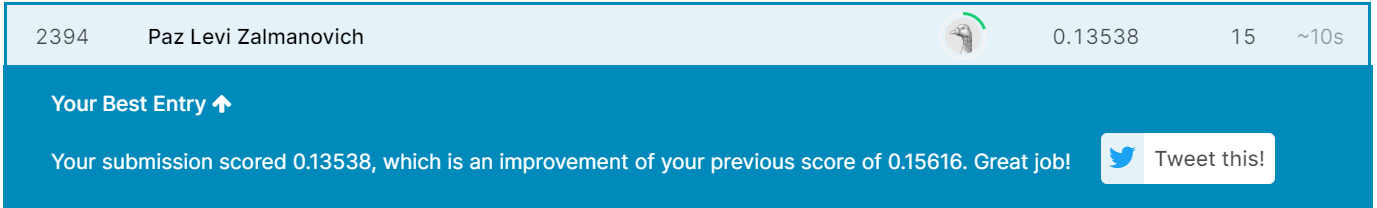

# task 1 - results

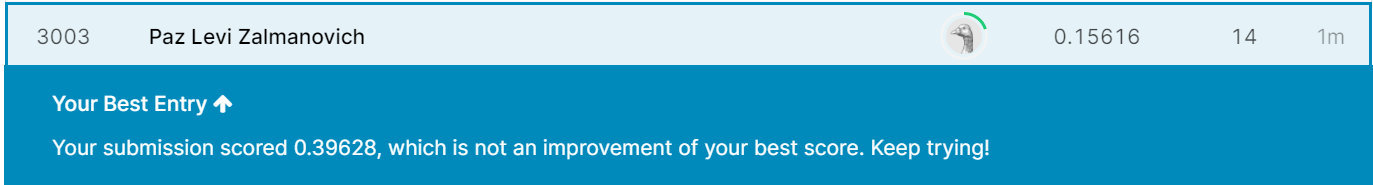

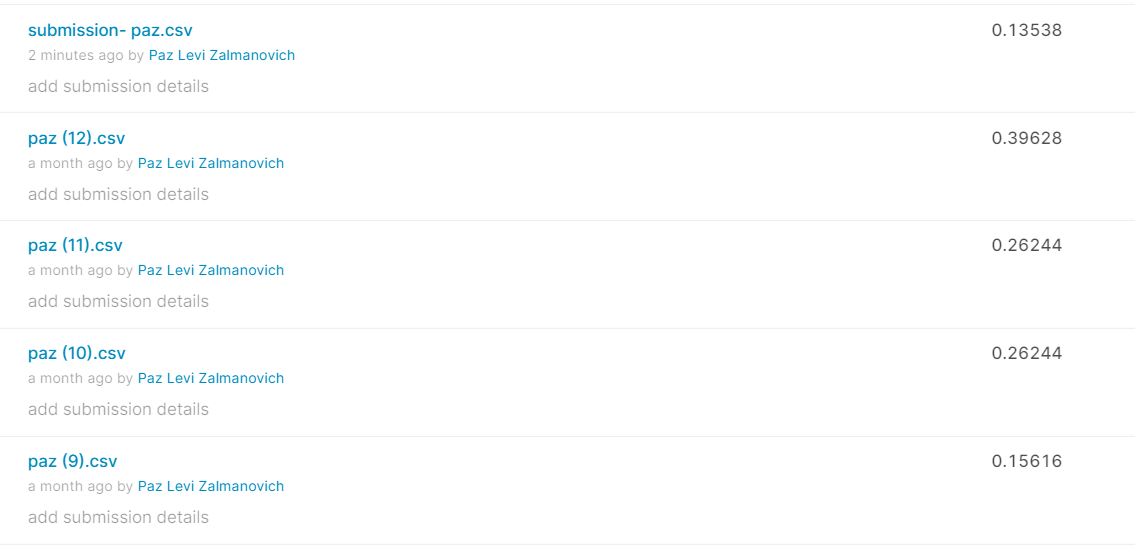